In [1]:
import numpy as np
import pandas as pd

In [3]:
messages = pd.read_csv('/content/SMSSpamCollection', sep='\t', names=["label", "message"])

In [5]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.shape

(5572, 2)

In [6]:
# 1.Data Cleaning
# 2.EDA(Exploratory data analysis)
# 3.Text Preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Web page using streamlit

# 1.Data Cleaning




In [7]:
# converting ham and spam into 0 & 1 values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(messages['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
messages['label'] = encoder.fit_transform(messages['label'])
messages.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# missing values
messages.isnull().sum()

label      0
message    0
dtype: int64

In [10]:
# check for duplicate values
messages.duplicated().sum()

403

In [11]:
# remove duplicates
messages = messages.drop_duplicates(keep='first')
messages.duplicated().sum()

0

In [12]:
messages.shape

(5169, 2)

# 2.EDA

In [13]:
messages.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

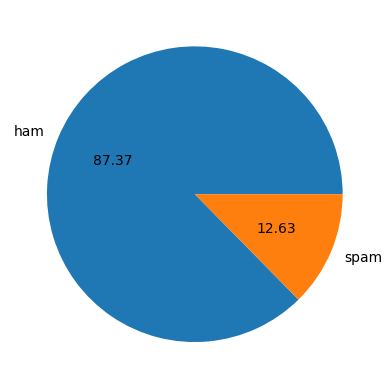

In [15]:
import matplotlib.pyplot as plt
plt.pie(messages['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
# from the above pie chart we get to know that the DATA IS IMBALANCED because there are more ham than spam

In [17]:
# Noww, made 3 columns to see number of CHARACTERS, number of WORDS and number of SENTENCES inside the SMS

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
#number of characters
messages['num_characters'] = messages['message'].apply(len)
messages.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#number of words
messages['num_words'] = messages['message'].apply(lambda x:len(nltk.word_tokenize(x)))
messages.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
#number of sentences
messages['num_sentences'] = messages['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
messages.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
#ham
messages[messages['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#spam
messages[messages['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<ipython-input-24-13cbf0857871>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(messages.corr(),annot=True)


<Axes: >

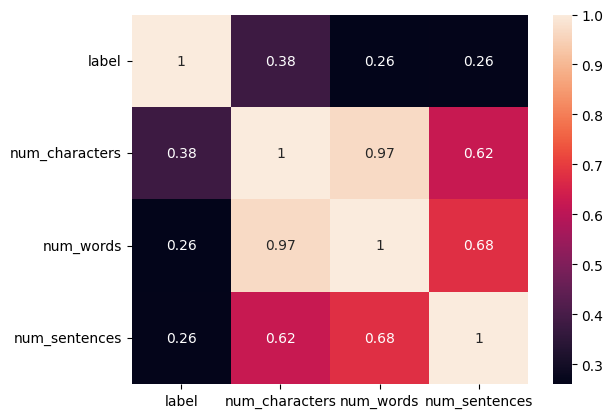

In [24]:
import seaborn as sns
sns.heatmap(messages.corr(),annot=True)

# **3.Preprocessing**
 * Lower Case
 * Tokenization
 * Removing special characters
 * Removing stop words and punctuation
 * Applying Stemming or Lemmatization

In [25]:
import nltk
import re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
def preprocess_text(text):
    ps = PorterStemmer()
    # Remove everything apart from A~Z ,a~z
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    # Using stemming technique
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [27]:
messages['message'].apply(preprocess_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [28]:
messages['transform_text'] = messages['message'].apply(preprocess_text)
messages.head()

,label,message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [29]:
#Creating wordcloud for spam messages
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,background_color='white')

In [30]:
spam_wc = wc.generate(messages[messages['label']==1]['transform_text'].str.cat(sep=" "))

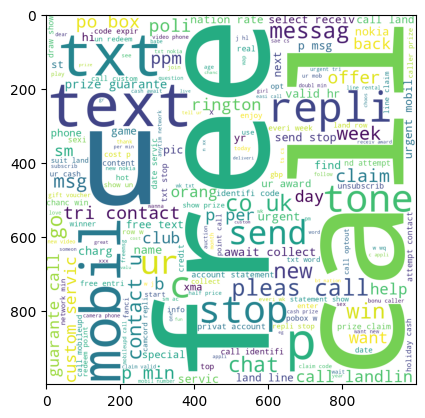

In [31]:
plt.imshow(spam_wc)

In [32]:
#Creating wordcloud for ham messages
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,background_color='white')

In [33]:
ham_wc = wc.generate(messages[messages['label']==0]['transform_text'].str.cat(sep=" "))

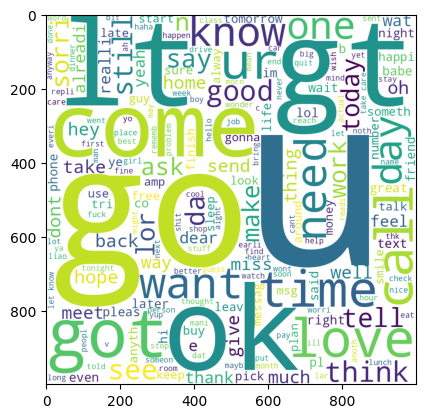

In [34]:
plt.imshow(ham_wc)

In [50]:
#top 30 words in spam messages
spam_corpus = []
for msg in messages[messages['label']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [51]:
len(spam_corpus)

10090

In [45]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,346
1,free,197
2,p,158
3,u,157
4,txt,152
5,text,129
6,mobil,121
7,ur,119
8,stop,116
9,repli,104


In [46]:
#top 30 words in ham messages
ham_corpus = []
for msg in messages[messages['label']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


In [47]:
len(ham_corpus)

35718

In [48]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,938
1,go,412
2,get,358
3,gt,288
4,lt,287
5,come,280
6,ok,256
7,call,242
8,like,238
9,know,237


# 4.Model Building


In [52]:
#Creating the Bag of Words(Document matrix) model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [53]:
X = tfidf.fit_transform(messages['transform_text']).toarray()

In [54]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [55]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
X.shape

(5169, 3000)

In [57]:
Y = messages['label'].values

In [58]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
#Performing Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 2)

In [60]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8588007736943907
[[787 121]
 [ 25 101]]
0.45495495495495497


In [63]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9729206963249516
[[908   0]
 [ 28  98]]
1.0


In [64]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9816247582205029
[[906   2]
 [ 17 109]]
0.9819819819819819


In [65]:
# choosing (tfidf --> mnb model)

The pickle library in Python is used for serializing and deserializing Python objects. Serialization is the process of converting a Python object into a byte stream, and deserialization is the process of reconstructing the Python object from a byte stream. Pickle provides a way to store Python objects in a compact binary format, preserving their structure and state.

Pickle allows you to save Python objects (e.g., variables, data structures, models) to a file and later load them back into memory. This is useful for preserving the state of objects across different program executions.

In [67]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

using the above two pickle file i.e model.pkl that contains the model and vectorizer that contains the vectors using tf-idf. for, creating the app.py file that contains the script to run the spam classifier.